# Introduction

We will be performing a data analysis on the NCSES survey to determine if demographic factors and/or COVID-19 had an effect on the employment of various college graduates employment.

## Major imports

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import ttest_ind
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import cohen_kappa_score, f1_score
import time

## Reading in csv data

In [27]:
df = pd.read_csv(filepath_or_buffer='ncses_table_srv_data_NSCG_2024-11-11T22_02_16Z\\ncses_table_raw_data_NSCG_2024-11-11T22_02_16Z.csv',thousands=',')
df.dropna(how='all',axis='index')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Year                                                2580 non-null   int64 
 1   Labor force status                                  2580 non-null   object
 2   Race (2003-2021)                                    2580 non-null   object
 3   Gender                                              2580 non-null   object
 4   Field of maj - most recent deg (major) (2003-2021)  2580 non-null   object
 5   Age group (5 year intv)                             2580 non-null   object
 6   Weighted Count                                      2580 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 141.2+ KB


Labels for data include Year, LFS, Race, Gender, Field of Maj, and the Weighted Count.

## Cleaning

In [28]:
df.isnull().count()

Year                                                  2580
Labor force status                                    2580
Race (2003-2021)                                      2580
Gender                                                2580
Field of maj - most recent deg (major) (2003-2021)    2580
Age group (5 year intv)                               2580
Weighted Count                                        2580
dtype: int64

In [29]:
df['Labor force status'].value_counts()

Labor force status
Employed      1632
Unemployed     948
Name: count, dtype: int64

In [30]:
#Saving old frame just in case
df_old = df
races = df['Race (2003-2021)'].unique()
df = df.replace(to_replace=races, value= list(range(0, len(races))))
df

C:\Users\pauli\AppData\Local\Temp\ipykernel_48912\2632857430.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace=races, value= list(range(0, len(races))))


,Year,Labor force status,Race (2003-2021),Gender,Field of maj - most recent deg (major) (2003-2021),Age group (5 year intv),Weighted Count
0,2021,Employed,0,Female,Computer and mathematical sciences,Ages 24 or younger,21198
1,2021,Employed,0,Female,Computer and mathematical sciences,Ages 25-29,42798
2,2021,Employed,0,Female,Computer and mathematical sciences,Ages 30-34,48353
3,2021,Employed,0,Female,Computer and mathematical sciences,Ages 35-39,32277
4,2021,Employed,0,Female,Computer and mathematical sciences,Ages 40-44,34064
...,...,...,...,...,...,...,...
2575,2019,Unemployed,5,Male,Non-S&E Fields,Ages 35-39,171
2576,2019,Unemployed,5,Male,Non-S&E Fields,Ages 40-44,13849
2577,2019,Unemployed,5,Male,Non-S&E Fields,Ages 45-49,9439
2578,2019,Unemployed,5,Male,Non-S&E Fields,Ages 50-54,1672


In [31]:
def toNum(dataf,column):
    lst = dataf[column].unique()
    dataf = dataf.replace(to_replace = lst, value= list(range(0,len(lst))))
    return dataf

In [32]:
columns = df.columns
columns = columns.drop(labels='Weighted Count',)
for x in columns:
    df = toNum(df,x)
columns

C:\Users\pauli\AppData\Local\Temp\ipykernel_48912\1756994110.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataf = dataf.replace(to_replace = lst, value= list(range(0,len(lst))))


Index(['Year', 'Labor force status', 'Race (2003-2021)', 'Gender',
       'Field of maj - most recent deg (major) (2003-2021)',
       'Age group (5 year intv)'],
      dtype='object')

In [33]:
df

,Year,Labor force status,Race (2003-2021),Gender,Field of maj - most recent deg (major) (2003-2021),Age group (5 year intv),Weighted Count
0,0,0,0,0,0,0,21198
1,0,0,0,0,0,1,42798
2,0,0,0,0,0,2,48353
3,0,0,0,0,0,3,32277
4,0,0,0,0,0,4,34064
...,...,...,...,...,...,...,...
2575,1,1,5,1,6,3,171
2576,1,1,5,1,6,4,13849
2577,1,1,5,1,6,5,9439
2578,1,1,5,1,6,6,1672


## EDA for dataset

In [34]:
#Test if variables have significance using t-test
for x in df.columns:
    if x == 'Labor force status':
        continue
    v1 = df['Labor force status']
    v2 = df[x]
    res = ttest_ind(v1, v2)
    print(f'Does {x} have significance? Answer:{res.pvalue<0.01}\nFull value:{res}\n')

Does Year have significance? Answer:True
Full value:TtestResult(statistic=-8.137220902607229, pvalue=5.024892162522004e-16, df=5158.0)

Does Race (2003-2021) have significance? Answer:True
Full value:TtestResult(statistic=-56.96647436066519, pvalue=0.0, df=5158.0)

Does Gender have significance? Answer:True
Full value:TtestResult(statistic=-10.771366980070118, pvalue=9.037638328403556e-27, df=5158.0)

Does Field of maj - most recent deg (major) (2003-2021) have significance? Answer:True
Full value:TtestResult(statistic=-68.2322001485345, pvalue=0.0, df=5158.0)

Does Age group (5 year intv) have significance? Answer:True
Full value:TtestResult(statistic=-72.55585257696804, pvalue=0.0, df=5158.0)

Does Weighted Count have significance? Answer:True
Full value:TtestResult(statistic=-13.898360679977802, pvalue=3.854201060557757e-43, df=5158.0)



In [35]:
df.describe()

,Year,Labor force status,Race (2003-2021),Gender,Field of maj - most recent deg (major) (2003-2021),Age group (5 year intv),Weighted Count
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2.580000e+03
mean,0.478682,0.367442,2.346124,0.514729,3.162403,4.762016,4.150441e+04
std,0.499642,0.482202,1.697101,0.499880,2.023989,3.038456,1.516829e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00
25%,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,6.530000e+02
50%,0.000000,0.000000,2.000000,1.000000,3.000000,5.000000,3.555000e+03
75%,1.000000,1.000000,3.000000,1.000000,5.000000,7.000000,1.941925e+04
max,1.000000,1.000000,5.000000,1.000000,6.000000,10.000000,1.599662e+06


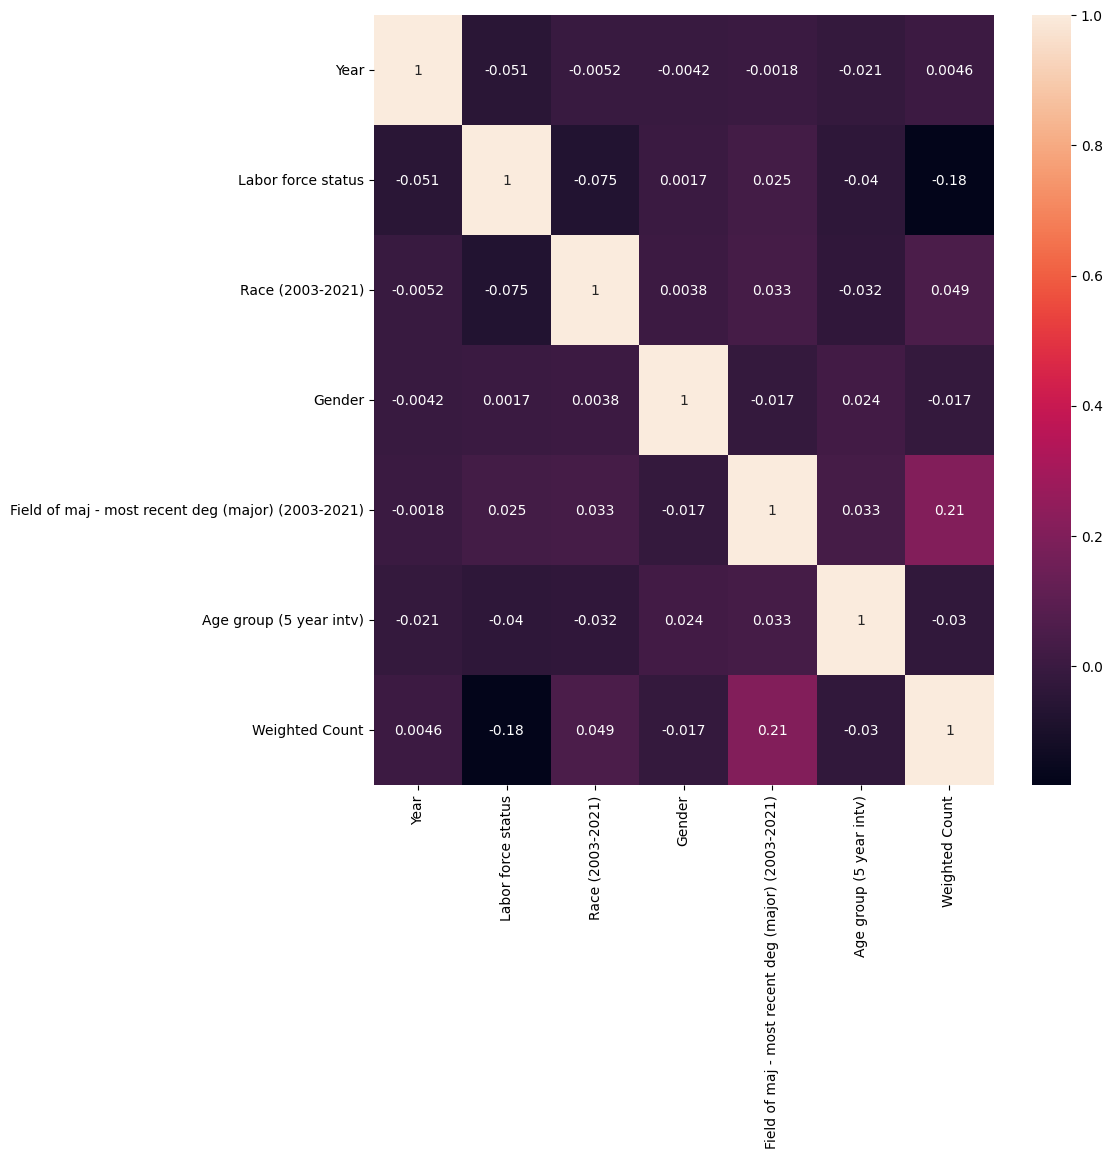

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(numeric_only=True),annot=True)
plt.show()

## Classification for employment

In [37]:
X = df.drop(columns = 'Labor force status')
y = df['Labor force status']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=746, test_size=0.3)

### Logistic Regression 

In [39]:

model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(f'Confusion matrix:\n {confusion_matrix(y_true=y_test,y_pred=y_pred)}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred)
print("AUC: ", roc_auc)


Accuracy: 68.99%
Confusion matrix:
 [[403  91]
 [149 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       494
           1       0.59      0.47      0.52       280

    accuracy                           0.69       774
   macro avg       0.66      0.64      0.65       774
weighted avg       0.68      0.69      0.68       774

AUC:  0.6418233082706767


c:\Users\pauli\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Naive Bayes Classifier

In [40]:
print("----------Naive Bayes Classifier--------------\n")

#your code
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(f'Confusion matrix:\n {confusion_matrix(y_true=y_test,y_pred=y_pred)}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred)
print("AUC: ", roc_auc)

----------Naive Bayes Classifier--------------

Accuracy: 54.13%
Confusion matrix:
 [[151 343]
 [ 12 268]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.31      0.46       494
           1       0.44      0.96      0.60       280

    accuracy                           0.54       774
   macro avg       0.68      0.63      0.53       774
weighted avg       0.75      0.54      0.51       774

AUC:  0.6314054366685946


### KNN

Text(0, 0.5, 'Error Rate')

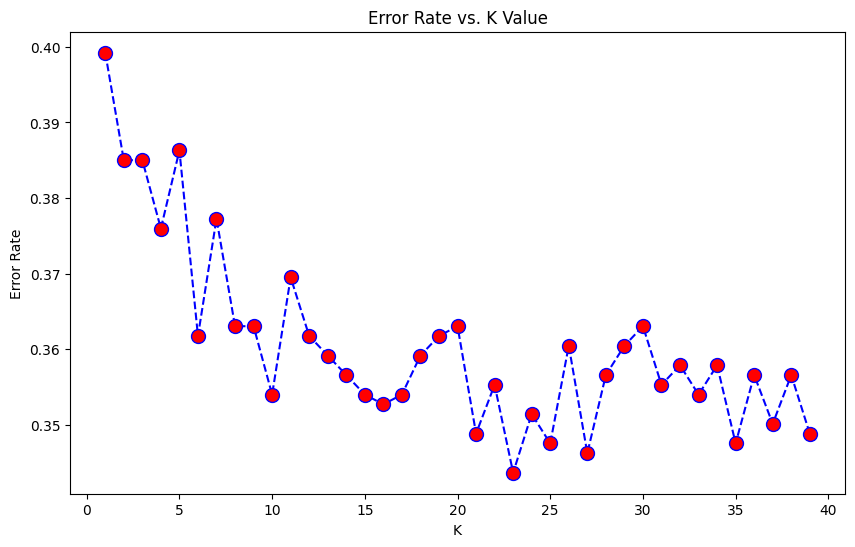

In [41]:
#Code from https://datascienceplus.com/k-nearest-neighbors-knn-with-python/

#Find the optimal k using for loop
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [42]:
#your code

# best k is 23
knn = KNeighborsClassifier(23)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(f'Confusion matrix:\n {confusion_matrix(y_true=y_test,y_pred=y_pred)}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


roc_auc = roc_auc_score(y_test,y_pred)
print("AUC: ", roc_auc)

Accuracy: 65.63%
Confusion matrix:
 [[385 109]
 [157 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74       494
           1       0.53      0.44      0.48       280

    accuracy                           0.66       774
   macro avg       0.62      0.61      0.61       774
weighted avg       0.65      0.66      0.65       774

AUC:  0.609318970503181


### SVM

In [43]:
model_sv = SVC()
model_sv.fit(X_train,y_train)

y_pred = model_sv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(f'Confusion matrix:\n {confusion_matrix(y_true=y_test,y_pred=y_pred)}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred)
print("AUC: ", roc_auc)

Accuracy: 63.82%
Confusion matrix:
 [[494   0]
 [280   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       494
           1       0.00      0.00      0.00       280

    accuracy                           0.64       774
   macro avg       0.32      0.50      0.39       774
weighted avg       0.41      0.64      0.50       774

AUC:  0.5


c:\Users\pauli\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pauli\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pauli\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Random Forest

In [44]:
model_rf = RandomForestClassifier(n_jobs=1)
gs_rf = GridSearchCV(estimator=model_rf,
                     param_grid={'max_depth':np.arange(1,31)},
                     cv=5,
                     scoring='roc_auc')

start_time = time.time()

model9=gs_rf.fit(X_train,y_train)

print("--- %s minutes ---" % (time.time() - start_time))

(time.time() - start_time)/60

--- 31.364997386932373 minutes ---


0.5227499564488729

In [45]:
y_1 = gs_rf.predict(X_test)
diff=np.sum(y_test-y_1)
error1=diff/len(y_test)
error1

score = f1_score(y_test, y_1, pos_label=1)
print('F1 Score: %.3f' % score)

print(confusion_matrix(y_test, y_1))
print(classification_report(y_test, y_1))

print("Accuracy:",accuracy_score(y_test, y_1))

cohen=cohen_kappa_score(y_test, y_1)
print('Cohen Kappa: %.3f' % cohen)

auc_score = roc_auc_score(y_test, y_1)

print('AUC: %.3f' % auc_score)

F1 Score: 0.833
[[449  45]
 [ 48 232]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       494
           1       0.84      0.83      0.83       280

    accuracy                           0.88       774
   macro avg       0.87      0.87      0.87       774
weighted avg       0.88      0.88      0.88       774

Accuracy: 0.8798449612403101
Cohen Kappa: 0.739
AUC: 0.869


### Analysis

Seems like Our models are really bad at predicting employment based on the demographics given